**PS1**

Planning Algorithms in AI

Kashirin Aleksandr

Skoltech 2021

**Important:** For all *(x, y)* plots you will want to use the Axes.set_aspect(’equal’) command in the
matplotlib library to set the aspect ratio so that equal tick mark increments on the *x-,y-* and *z-* axis are equal
in size. This makes spheres look like spheres, instead of an ellipsoid.

In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import numpy as np
import scipy.stats as sp
from scipy.integrate import simpson
from scipy.linalg import  cholesky
import matplotlib.pyplot as plt
#%matplotlib widget

# Control flags
labelsize = 14
titlesize = 16
suptitlesize = 18

**Task 1: Probability**

For this task, write a Python script or note-book that generates all the different figures, as requested on each
problem.

**A: Plot the probability density function p(x) of a one dimensional Gaussian distribution N (x; 1, 1).**

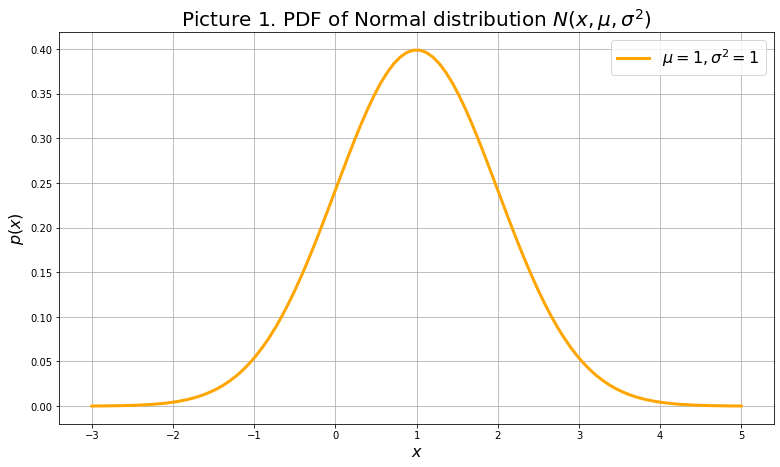

In [2]:


# Control variables
suptitlesize = 22
labelsize = 16
titlesize = 20


# Distribution parameters
mu = 1
var = 1

x = np.linspace(-3, 5, 100)
p_x = sp.norm.pdf(x, mu, var)

# Plot the figure
plt.figure(figsize=[6.4*2, 4.8*1.5])
plt.plot(x, p_x, linewidth=3, color="orange", label=r'$\mu=1, \sigma^2=1$')
plt.grid(True)
plt.legend(loc="upper right", fontsize=labelsize)
plt.title(r'Picture 1. PDF of Normal distribution $N(x, \mu, \sigma^2)$', fontsize=titlesize)
plt.xlabel(r"$x$", fontsize=labelsize)
plt.ylabel(r"$p(x)$", fontsize=labelsize)
plt.show()

**B: Calculate the probability mass that the random variable X is less than 0.**

Probability mass that the r.v. X is less than 0: F(x=0)=0.15866


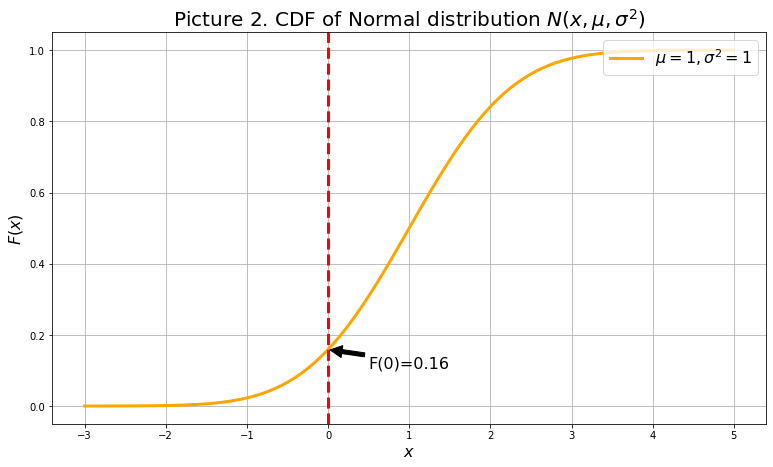

In [3]:
F_x = sp.norm.cdf(x, mu, var)

F = sp.norm.cdf(0, mu, var)

print(f"Probability mass that the r.v. X is less than 0: F(x=0)={F:0.5f}")

# Plot the figure
plt.figure(figsize=[6.4*2, 4.8*1.5])
plt.plot(x, F_x, linewidth=3, color="orange", label=r'$\mu=1, \sigma^2=1$')
plt.axvline(x=0, linewidth=3, color="red", linestyle="--")
plt.annotate(f'F(0)={F:0.2f}', xy=(0, F),  xycoords='data',
            xytext=(0.5, 0.1), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=labelsize
            )
plt.grid(True)
plt.legend(loc="upper right", fontsize=labelsize)
plt.title(r'Picture 2. CDF of Normal distribution $N(x, \mu, \sigma^2)$', fontsize=titlesize)
plt.xlabel(r"$x$", fontsize=labelsize)
plt.ylabel(r"$F(x)$", fontsize=labelsize)
plt.show()

**C: Consider the new observation variable z, it gives information about the variable x by the likelihood function p(z|x) = N(z; x; $\sigma^2$), with variance $\sigma^2$ = 0,2. Apply the Bayes’ theorem to derive the posterior distribution, p(x|z), given an observation z = 0,75 and plot it. For a better comparison, plot the prior distribution, p(x), too.**

1. Prior distribution: $p(x) = N(x, 1, 1)$;
2. Likelyhood function: $p(z|x) = N(z, x, \sigma^2)$;
3. Observation given: $z=0.75$
4. $p(z)$ - Normalization factor that does not depended on $x$
5. Find posterior distribution: $p(x|z)$ ?

**Step 1:** Bayes’ theorem

$p(x|z) = \frac{p(x,z)}{p(z)} = \frac{p(z|x) \times p(x)}{p(z)} \implies  posterior = \frac{likelyhood \times prior}{norm}$

**Step 2:** CDF

$\int_{-\infty}^\infty p(x|z)\,\mathrm{d}x = 1$

Hence:

$1 = C \times \int_{-\infty}^\infty p(z|x) \times p(x)\,\mathrm{d}x$, where $C = \frac{1}{p(z)}$

**Step 3:** Find $p(z|x) \times p(x)$

$p(z|x) \times p(x) = N(z, x, \sigma^2) \times N(x, 1, 1) = \frac{1}{\sigma\sqrt{2\pi}}\mathrm{e}^{-\frac{1}{2}\left(\frac{z-x}{\sigma}\right)^2} \times \frac{1}{\sqrt{2\pi}}\mathrm{e}^{-\frac{1}{2}\left(x-1\right)^2} = \left[z=0.75\right] \implies \frac{1}{2\sigma\pi}\mathrm{e}^{-\frac{1}{2}\left(\left(\frac{0.75-x}{\sigma}\right)^2 + \left(x-1\right)^2 \right)} = \frac{1}{2\sigma\pi}\mathrm{e}^{-\frac{1}{2}\left(\frac{(0.75-x)^2+\sigma^2(x-1)^2}{\sigma^2}\right)} = \left[\sigma^2=0.2\right] \implies  \frac{1}{2\sqrt{0.2}\pi}\mathrm{e}^{-\frac{1}{2}\left(\frac{(0.75-x)^2+0.2(x-1)^2}{0.2}\right)}$

**Step 4:** Find $\int_{-\infty}^\infty p(z|x) \times p(x)\,\mathrm{d}x$

$\frac{1}{2\sqrt{0.2}\pi}\int_{-\infty}^\infty \mathrm{e}^{-\frac{1}{2}\left(\frac{(0.75-x)^2+0.2(x-1)^2}{0.2}\right)}\mathrm{d}x = 0.3558812717 \times 0.99702157 = 0.354821$

Hence:

$p(z) = 0.354821$

**Step 5:** Find posterior distribution: $p(x|z)$ 
$p(x|z=0.75) = \frac{1}{0.354821} \times \frac{1}{2\sqrt{0.2}\pi}\mathrm{e}^{-\frac{1}{2}\left(\frac{(0.75-x)^2+0.2(x-1)^2}{0.2}\right)} = \frac{1}{0.99702}\mathrm{e}^{-\frac{1}{2}\left(\frac{(0.75-x)^2+0.2(x-1)^2}{0.2}\right)} = 1.002 \mathrm{e}^{-\frac{1}{2}\left(\frac{(0.75-x)^2+0.2(x-1)^2}{0.2}\right)} \approx \mathrm{e}^{-\frac{1}{2}\left(\frac{(0.75-x)^2+0.2(x-1)^2}{0.2}\right)}$

**Step 5:** Plot $p(x|z)$ and $p(x)$

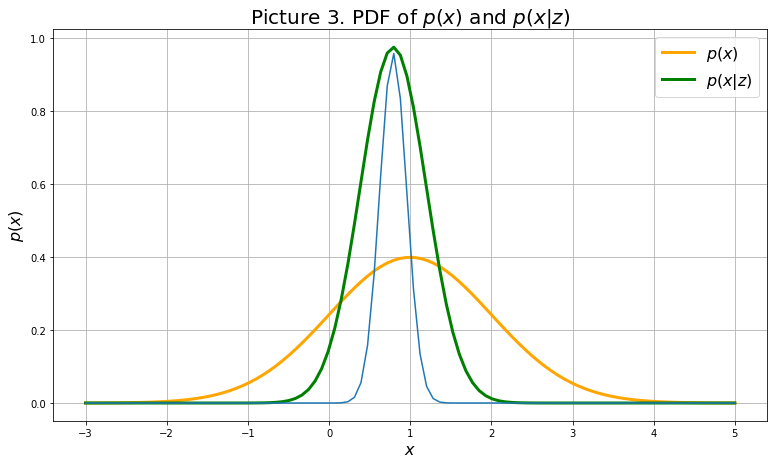

In [15]:
p_x_z = np.e**((-0.5) * (((0.75-x)**2 + 0.2*(x-1)**2)/0.2))
# Plot the figure
plt.figure(figsize=[6.4*2, 4.8*1.5])
plt.plot(x, p_x, linewidth=3, color="orange", label=r'$p(x)$')
plt.plot(x, p_x_z, linewidth=3, color="green", label=r'$p(x|z)$')
plt.plot(x, p)
plt.grid(True)
plt.legend(loc="upper right", fontsize=labelsize)
plt.title(r'Picture 3. PDF of $p(x)$ and $p(x|z)$', fontsize=titlesize)
plt.xlabel(r"$x$", fontsize=labelsize)
plt.ylabel(r"$p(x)$", fontsize=labelsize)
plt.show()

**Alternative way to calculate p(z) numerically:**

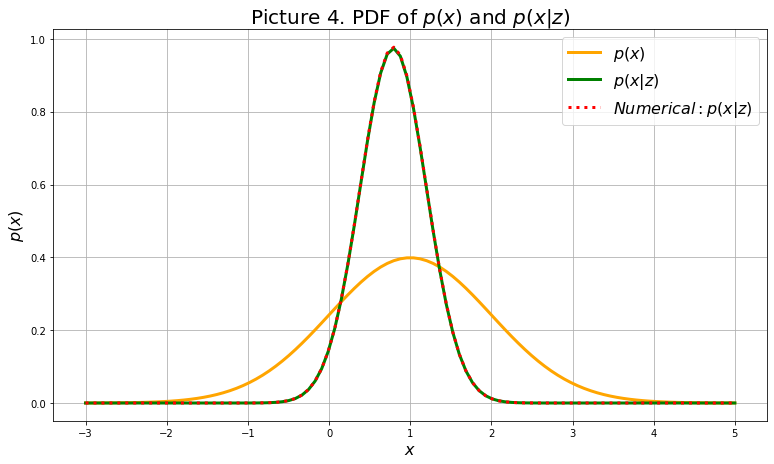

In [38]:
f_x =  1 / (2 * np.pi * np.sqrt(0.2)) * np.e**((-0.5) * (((0.75-x)**2 + 0.2*(x-1)**2)/0.2))

p_z = simpson(f_x, x)

alt_p_x_z = 1/p_z * f_x

# Plot the figure
plt.figure(figsize=[6.4*2, 4.8*1.5])
plt.plot(x, p_x, linewidth=3, color="orange", label=r'$p(x)$')
plt.plot(x, p_x_z, linewidth=3, color="green", label=r'$p(x|z)$')
plt.plot(x, alt_p_x_z, linewidth=3, color="red", linestyle=':', label=r'$Numerical: p(x|z)$')
plt.grid(True)
plt.legend(loc="upper right", fontsize=labelsize)
plt.title(r'Picture 4. PDF of $p(x)$ and $p(x|z)$', fontsize=titlesize)
plt.xlabel(r"$x$", fontsize=labelsize)
plt.ylabel(r"$p(x)$", fontsize=labelsize)
plt.show()

**Task 2: Multivariate Gaussian**

**A: Write the function plot2dcov which plots the 2d contour given three core parameters: mean,
covariance, and the iso-contour value k. You may add any other parameter such as color, number of points,
etc. Then, use plot2dcov to draw the iso-contours corresponding to 1,2,3-sigma of the following Gaussian distributions.**

In [39]:
def plot2dcov(mean, cov, k, n=30, picture_n=0, color='blue', xytext=(0, 0)):
  """Plots the 2d contour

  Args:
    mean -  Distribution mean
    cov  -  Distribution covariance matrix
    k    -  iso-counter value (Radius of the corresponded circle) (1, 2, 3, "all")
    n    -  Number of points to calculate

  Returns:
    plot - Plot of the ellipsoid corresponded to the sigma-level k

  """
  # Check k value
  assert (k == 1 or k == 2 or k == 3 or k == "all"), f'Check the value k! You put k={k}. Possible values of k:(1, 2, 3, "all")'

  # Check cov matrix
  assert np.shape(cov) == (2, 2), f"Covariance matrix should have a (2,2) shape form. You put {np.shape(cov)} shape form."
  assert (cov[0,0]) >= 0 and (cov[1,1]) >= 0, f"Covariance matrix matrix should be positively defined. You put cov={cov}"

  # Check mean
  assert len(mean) == 2, f"Mean vector should have only 2 values. You put {len(mean)} values."

  # Get the lower-case triangular matrix form Cholesky decomposition
  L = cholesky(cov, lower=True)

  if k != "all":
    # Generate an array of coordinates of the circle for the N(x, 0, 1)
    t = np.linspace(0, 2*np.pi, n)
    x =  k * np.cos(t)
    y =  k * np.sin(t)

    # Transpose the circle accordingly the covariance
    coords = L @ np.array((x,y))
    coords[0] += mean[0]
    coords[1] += mean[1]

    # Plot figure
    #fig = plt.figure(figsize=[6.4*3, 4.8*3])
    #ax = fig.add_subplot(111)
    #plt.plot(x,y)
    ax = plt.subplot()
    ax.plot(coords[0], coords[1], linewidth=3, color=color)
    ax.plot(mean[0], mean[1], marker='o')
    ax.annotate(f'$\mu=({mean[0]:2.2f}, {mean[1]:2.2f})$', xy=(mean[0], mean[1]),  xycoords='data',
            xytext=xytext, fontsize=labelsize)
    ax.grid(True)
    ax.set_title(f'Picture {picture_n}. 2D Gaussian ISO-countour for k={k}', fontsize=titlesize)
    ax.set_xlabel('X', fontsize=labelsize)
    ax.set_ylabel('Y', fontsize=labelsize)
    # Set axis equality scale
    ax.set_aspect('equal')
    #plt.show()

  else:
    # Generate an array of coordinates of the circle for the N(x, 0, 1)
    t = np.linspace(0, 2*np.pi, n)
    coords = np.zeros((3, 2, n))
    for i in range(3):
      x = (i+1) * np.cos(t)
      y = (i+1) * np.sin(t)

      # Transpose the circle accordingly the covariance
      coords[i] = L @ np.array((x,y))
      coords[i, 0] += mean[0]
      coords[i, 1] += mean[1]

    # Plot figure
    #fig = plt.figure(figsize=[6.4*3, 4.8*3])
    ax = plt.subplot()
    ax.plot(coords[0, 0], coords[0, 1], linewidth=3, color='red', label=r'$k=1$')
    ax.plot(coords[1, 0], coords[1, 1], linewidth=3, color='blue', label=r'$k=2$')
    ax.plot(coords[2, 0], coords[2, 1], linewidth=3, color='green', label=r'$k=3$')
    #plt.plot(x+mean[0],y+mean[1]) 
    ax.plot(mean[0], mean[1], marker='o')
    ax.annotate(f'$\mu=({mean[0]}, {mean[1]})$', xy=(mean[0], mean[1]),  xycoords='data',
            xytext=xytext, fontsize=labelsize)
    ax.grid(True)
    ax.set_title(f'Picture {picture_n}. 2D Gaussian ISO-countours', fontsize=titlesize)
    ax.set_xlabel('X', fontsize=labelsize)
    ax.set_ylabel('Y', fontsize=labelsize)
    ax.legend(loc='upper right', fontsize=labelsize)
    # Set axis equality scale
    ax.set_aspect('equal')
    #plt.show()
  return ax

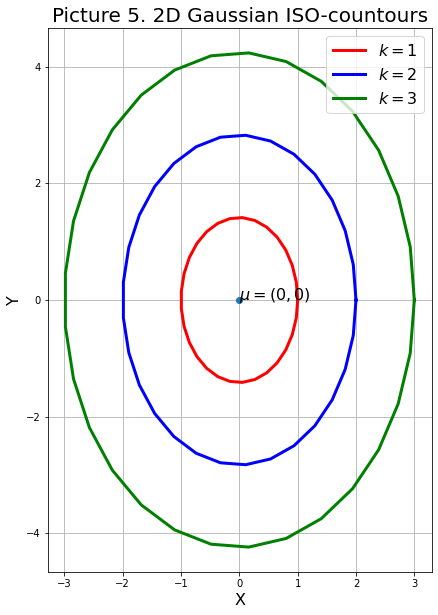

In [40]:
# Example 1
mean_1 = np.array((0, 0))
cov_1 = np.array(((1, 0), (0, 2)))
plt.figure(figsize=[10, 10])
plot2dcov(mean_1, cov_1, "all", picture_n=5)
plt.show()

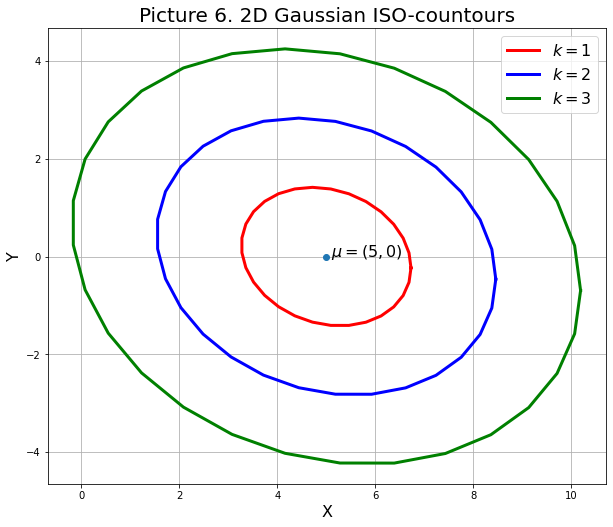

In [41]:
# Example 2
mean_2 = np.array((5, 0))
cov_2 = np.array(((3, -0.4), (-0.4, 2)))
plt.figure(figsize=[10, 10])
plot2dcov(mean_2, cov_2, "all", picture_n=6, xytext=(mean_2[0]+0.1, mean_2[1]))
plt.show()

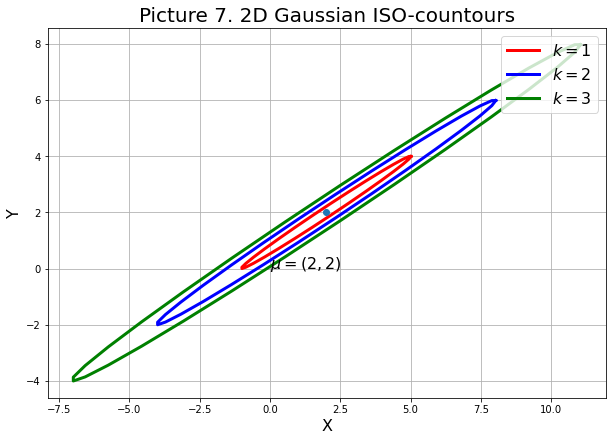

In [42]:
# Example 3
mean_3 = np.array((2, 2))
cov_3 = np.array(((9.1, 6), (6, 4)))
plt.figure(figsize=[10, 10])
plot2dcov(mean_3, cov_3, "all", picture_n=7)
plt.show()

**B. Write the equation of sample mean and sample covariance of a set of points {xi}, in vector form:**

Sample mean in vector form: 
$\bar{x} = \frac{1}{N} \displaystyle\sum_{i=1}^{N} x_{i} = \begin{bmatrix} \bar{x}_{1} \\ ... \\ \bar{x}_{i} \\ ... \\ \bar{x}_{N}\end{bmatrix}$

Sample covariance in vector form:
$ \Sigma_{x} = \frac{1}{N-1} \displaystyle\sum_{i=1}^{N} (x_{i} - \bar{x})(x_{i} - \bar{x})^T = \begin{bmatrix} \sigma_{x_1 x_1} & \sigma_{x_1 x_2} & ... & \sigma_{x_1 x_N} \\ \sigma_{x_2 x_1} & \sigma_{x_2 x_2} & ... & \sigma_{x_2 x_N} \\ ... & ... & ... & ... & \\ \sigma_{x_N x_1} & \sigma_{x_N x_2} & ... & \sigma_{x_N x_N}  \end{bmatrix}$

**C.  Draw random samples from a multivariate normal distribution. You can use the python function
that draws samples from the univariate normal distribution N (0, 1). In particular, draw and plot 200 samples from given distribution; also plot their corresponding 1-sigma iso-contour.**

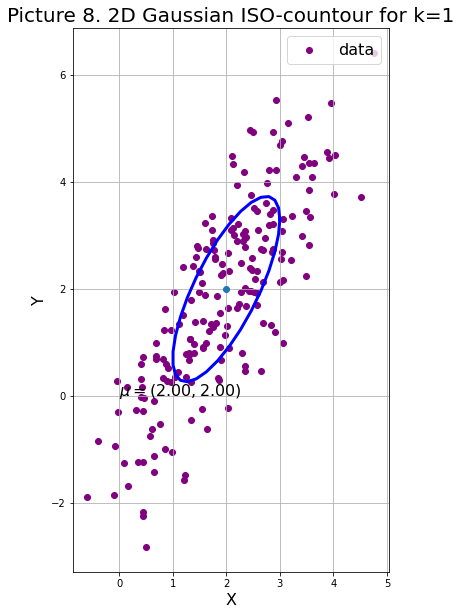

In [43]:
def sample_2d_gaussian(mean, cov, n):
    """ Function returns 2D sample array with defined mean and cov

    Args: 
        mean - Distribution mean
        cov - Distribution covariance
        n - amount of samples

    Returns:
        y - Resulted array of points [x, y] n samples
    """
    # 1. Sample from x~N(0, I)
    x = np.random.randn(2, n)

    # 2. Find b=mu_y
    b = np.copy(mean)

    # 3. Find A : A * A^T = cov_y
    A = cholesky(cov, lower=True)

    # 4. Make affine transforamtion y = Ax + b
    y = np.array([A @ x[:, i] + b for i in range(n)])
    
    return y

# Distribution parameters
mean = np.array((2, 2))
cov = np.array(((1, 1.3), (1.3, 3)))

y1 = sample_2d_gaussian(mean, cov, 200)

# Draw scatter plot of the data and 1-k isocountour
plt.figure(figsize=[10, 10])
plot2dcov(mean, cov, 1, picture_n=8)
plt.scatter(y1[:, 0], y1[:, 1], color='purple', label='data')
plt.legend(loc='upper right', fontsize=labelsize)
plt.show()

Sample mean:  [1.93709422 1.85810388]
Sample covariance: 
[[1.06499933 1.46287336]
 [1.46287336 3.12691552]]


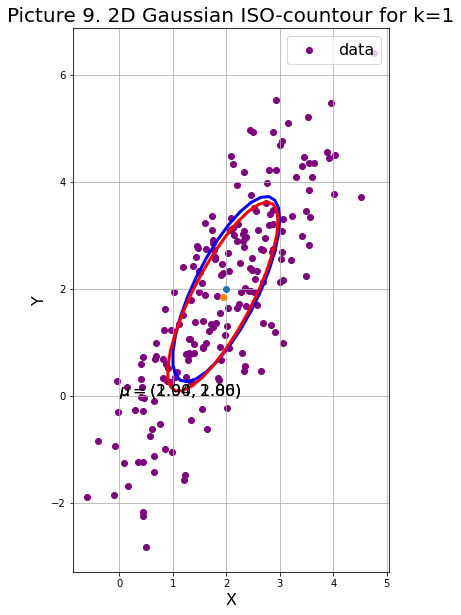

In [44]:
def get_sample_mean(arr):
    """ Returns sample mean of 2D array [x, y]
    """
    return np.array((sum(arr[:, 0]) / len(arr[:, 0]), sum(arr[:, 1]) / len(arr[:, 1])))

def get_sample_cov(arr):
    """ Returns sample covariance of 2D array [x, y]
    """
    sample_mean = get_sample_mean(arr)
    # Sample covariance
    sigma_aa = sum((arr[:, 0] - sample_mean[0])**2) / (len(arr[:, 0] - 1))
    sigma_bb = sum((arr[:, 1] - sample_mean[1])**2) / (len(arr[:, 1] - 1))
    sigma_ab = sum((arr[:, 0] - sample_mean[0]) * (arr[:, 1] - sample_mean[1]))  / (len(arr[:, 0] - 1))
    return np.array(((sigma_aa, sigma_ab), (sigma_ab, sigma_bb)))

# Calculate sample mean and covariance
sample_mean = get_sample_mean(y1)
print('Sample mean: ', sample_mean)
sample_cov = get_sample_cov(y1)
print('Sample covariance: ')
print(sample_cov)

# Print k=1 iso-countour
plt.figure(figsize=[10, 10])
plot2dcov(mean, cov, 1)
plt.scatter(y1[:, 0], y1[:, 1], color='purple', label='data')
plt.legend(loc='upper right', fontsize=labelsize)
plot2dcov(sample_mean, sample_cov, 1, picture_n=9, color='red')
plt.show()

Sample mean:  [1.82783776 1.76520791]
Sample covariance: 
[[0.74448766 0.96337013]
 [0.96337013 2.69063635]]


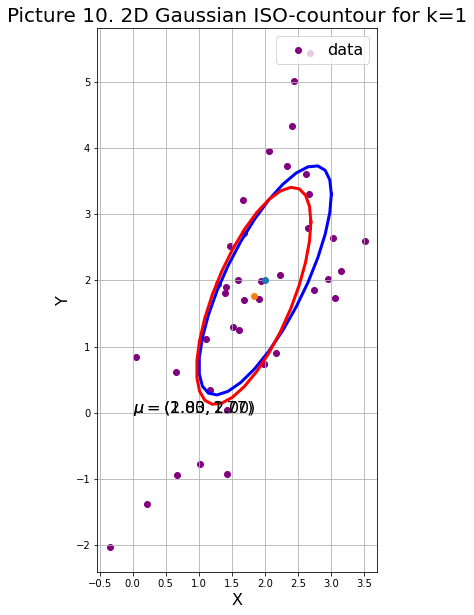

In [45]:
# Number of samples = 40
y2 = sample_2d_gaussian(mean, cov, 40)

# Calculate sample mean and covariance
sample_mean = get_sample_mean(y2)
print('Sample mean: ', sample_mean)
sample_cov = get_sample_cov(y2)
print('Sample covariance: ')
print(sample_cov)

# Print k=1 iso-countour
plt.figure(figsize=[10, 10])
plot2dcov(mean, cov, 1)
plt.scatter(y2[:, 0], y2[:, 1], color='purple', label='data')
plt.legend(loc='upper right', fontsize=labelsize)
plot2dcov(sample_mean, sample_cov, 1, picture_n=10, color='red')
plt.show()

Sample mean:  [2.64312888 2.41219881]
Sample covariance: 
[[1.04085879 1.4917891 ]
 [1.4917891  3.35967109]]


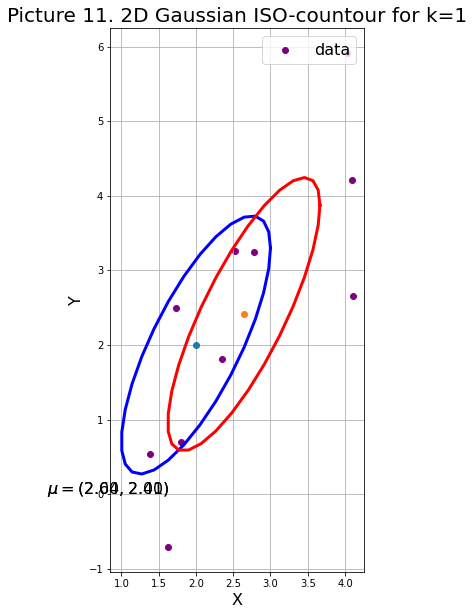

In [46]:
# Number of samples = 10
y3 = sample_2d_gaussian(mean, cov, 10)

# Calculate sample mean and covariance
sample_mean = get_sample_mean(y3)
print('Sample mean: ', sample_mean)
sample_cov = get_sample_cov(y3)
print('Sample covariance: ')
print(sample_cov)

# Print k=1 iso-countour
plt.figure(figsize=[10, 10])
plot2dcov(mean, cov, 1)
plt.scatter(y3[:, 0], y3[:, 1], color='purple', label='data')
plt.legend(loc='upper right', fontsize=labelsize)
plot2dcov(sample_mean, sample_cov, 1, picture_n=11, color='red')
plt.show()

Sample mean:  [2.04120439 2.06432118]
Sample covariance: 
[[0.96396123 1.22552318]
 [1.22552318 2.78683544]]


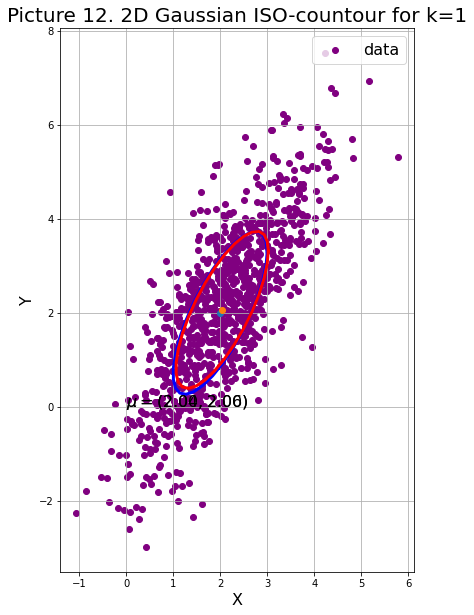

In [47]:
# Number of samples = 1000
y4 = sample_2d_gaussian(mean, cov, 1000)

# Calculate sample mean and covariance
sample_mean = get_sample_mean(y4)
print('Sample mean: ', sample_mean)
sample_cov = get_sample_cov(y4)
print('Sample covariance: ')
print(sample_cov)

# Print k=1 iso-countour
plt.figure(figsize=[10, 10])
plot2dcov(mean, cov, 1)
plt.scatter(y4[:, 0], y4[:, 1], color='purple', label='data')
plt.legend(loc='upper right', fontsize=labelsize)
plot2dcov(sample_mean, sample_cov, 1, picture_n=12, color='red')
plt.show()

**Conclusion:** The higher the amount of samples the more accurate results we can obtain regarding the distribution parameters.

**Task 3:** Covariance Propagation

For this task, we will model an omni-directional robotic platform, i.e., a holonomic platform moving as a free point without restrictions.

**A: Write the equations corresponding to the mean and covariance after a single propagation of the
holonomic platform.**

Derivation is listed below, please see attachments.

**B: Draw the propagation state PDF (1-sigma iso-contour) for times indexes t = 0, . . . , 5 and the control sequence ut = [3, 0]⊤ for all times t.**

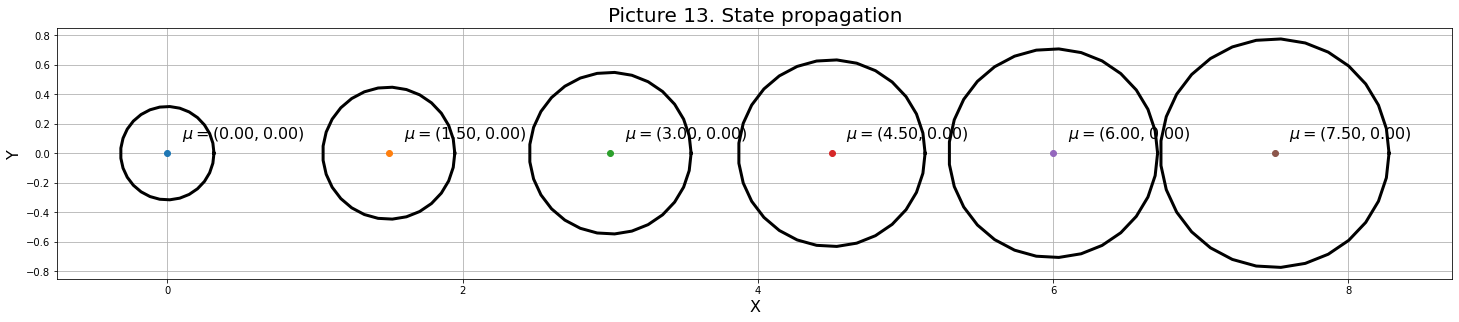

In [48]:
# Dynamic matrix
A = np.array([  [1, 0],
                [0, 1] ])

# Initial state parameters
mean_X_0 = np.array((0, 0))

cov_X_0 = np.array([ [0.1, 0],
                     [0, 0.1] ])

# Control sequence 
u = np.array((3, 0))

# Time step
dt = 0.5  

# Input gain matrix 
B = np.array([  [dt, 0],    
                [0, dt] ])

# Noise model
mean_noise = np.array((0, 0))

cov_noise = np.array([ [0.1, 0],
                       [0, 0.1] ])

# Define data structure for the state propagation
mean_prop = np.zeros((6, 2))
mean_prop[0] = mean_X_0

cov_prop = np.zeros((6, 2, 2))
cov_prop[0] = cov_X_0

def get_mean_t(A, mean_t_1, B, u, mean_noise):
    return A @ mean_t_1 + B @ u + mean_noise

def get_cov_t(A, cov_X_t_1, cov_noise):
    return A @ cov_X_t_1 @ A.T + cov_noise

for i in range(1, 6):
    noise_sample = sample_2d_gaussian(mean_noise, cov_noise, 1)
    mean_prop[i] = get_mean_t(A, mean_prop[i-1], B, u, mean_noise)
    cov_prop[i] = get_cov_t(A, cov_prop[i-1], cov_noise)

# Plot iso countours
plt.figure(figsize=[25, 10])
for i in range(6):
    plot2dcov(mean_prop[i], cov_prop[i], 1, color='black', xytext=(mean_prop[i, 0] + 0.1, mean_prop[i, 1] + 0.1))
plt.title('Picture 13. State propagation', fontsize=titlesize)
plt.show()

**Conclusion:** In this linear model kinematics of the robot is simple and predictable.

**C.  Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed. Draw the propagation state PDF (1-sigma iso-contour and 500 particles) for times indexes t = 0, . . . , 5**

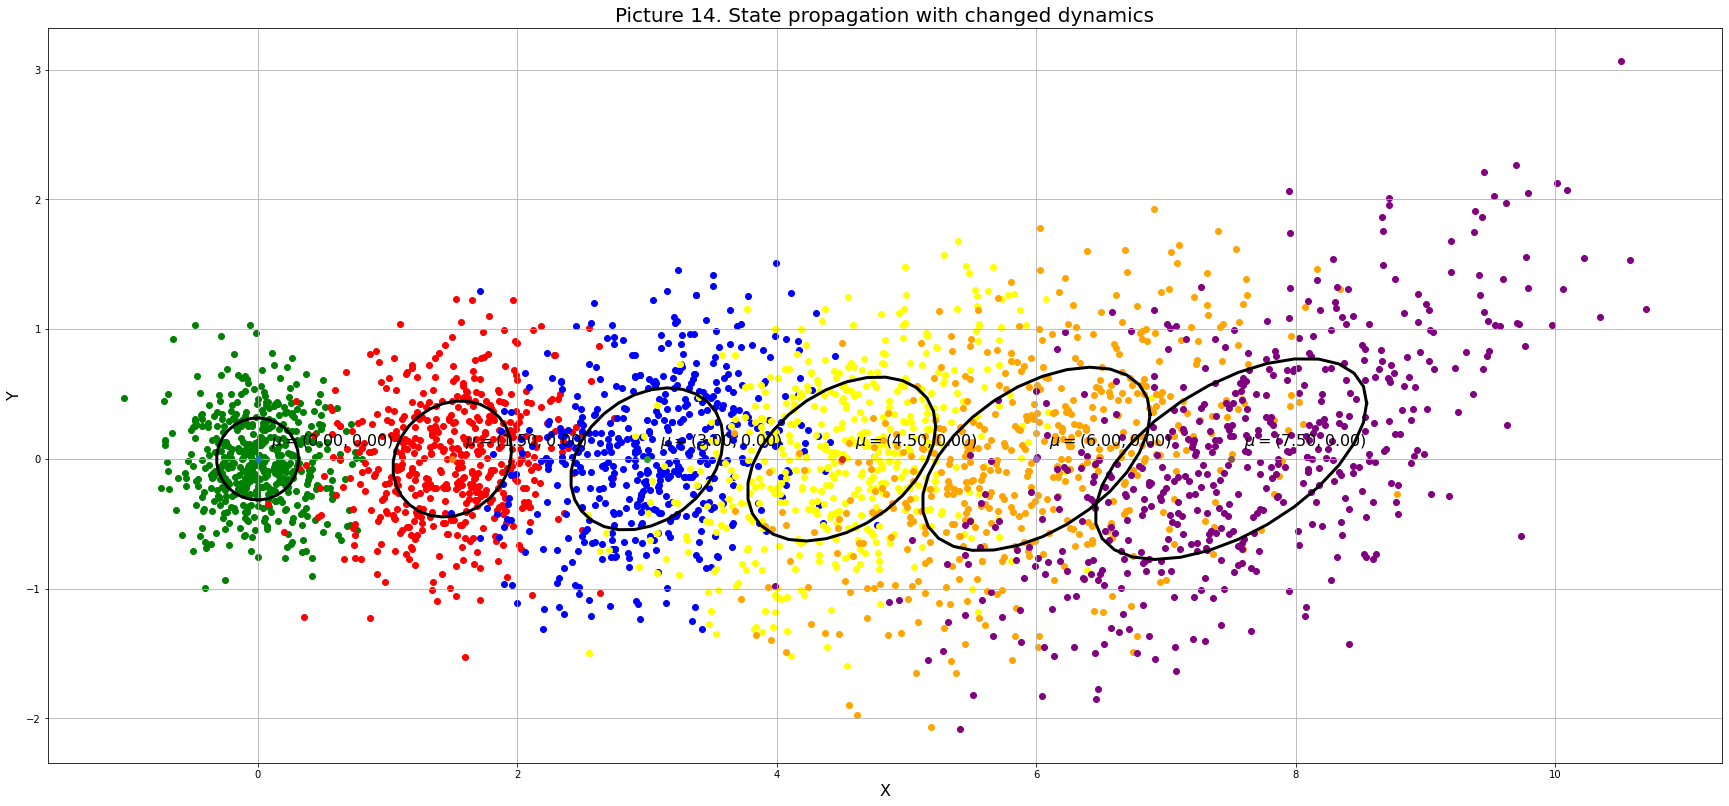

In [49]:
# Dynamic matrix
A = np.array([  [1, 0.3],
                [0, 1] ])

# Initial state parameters
mean_X_0 = np.array((0, 0))

cov_X_0 = np.array([ [0.1, 0],
                     [0, 0.1] ])

# Control sequence 
u = np.array((3, 0))

# Time step
dt = 0.5  

# Input gain matrix 
B = np.array([  [dt, 0],    
                [0, dt] ])

# Noise model
mean_noise = np.array((0, 0))

cov_noise = np.array([ [0.1, 0],
                       [0, 0.1] ])

# Define data structure for the state propagation
mean_prop = np.zeros((6, 2))
mean_prop[0] = mean_X_0

cov_prop = np.zeros((6, 2, 2))
cov_prop[0] = cov_X_0

for i in range(1, 6):
    noise_sample = sample_2d_gaussian(mean_noise, cov_noise, 1)
    mean_prop[i] = get_mean_t(A, mean_prop[i-1], B, u, mean_noise)
    cov_prop[i] = get_cov_t(A, cov_prop[i-1], cov_noise)

# Plot iso countours
plt.figure(figsize=[30, 15])
colors = ['green', 'red', 'blue', 'yellow', 'orange', 'purple']
for i in range(6):
    # Number of samples = 1000
    y = sample_2d_gaussian(mean_prop[i], cov_prop[i], 500)
    plot2dcov(mean_prop[i], cov_prop[i], 1, color='black', xytext=(mean_prop[i, 0] + 0.1, mean_prop[i, 1] + 0.1))
    plt.scatter(y[:, 0], y[:, 1], color=colors[i], label='data')
plt.title('Picture 14. State propagation with changed dynamics', fontsize=titlesize)
plt.show()

**Conclusion:** Since, the dynamics of the robot has been changed, we can observe strange behavior in robot location.

**D: Now, suppose that the robotic platform is non-holonomic, and the corresponding propagation model has changed. Propagate, as explained in class (linearize plus covariance propagation), for five time intervals, using the
control $u_t = [3, 1.5]^⊤$ showing the propagated Gaussian by plotting the 1-sigma iso-contour.**

![](Scans/3a.pdf)

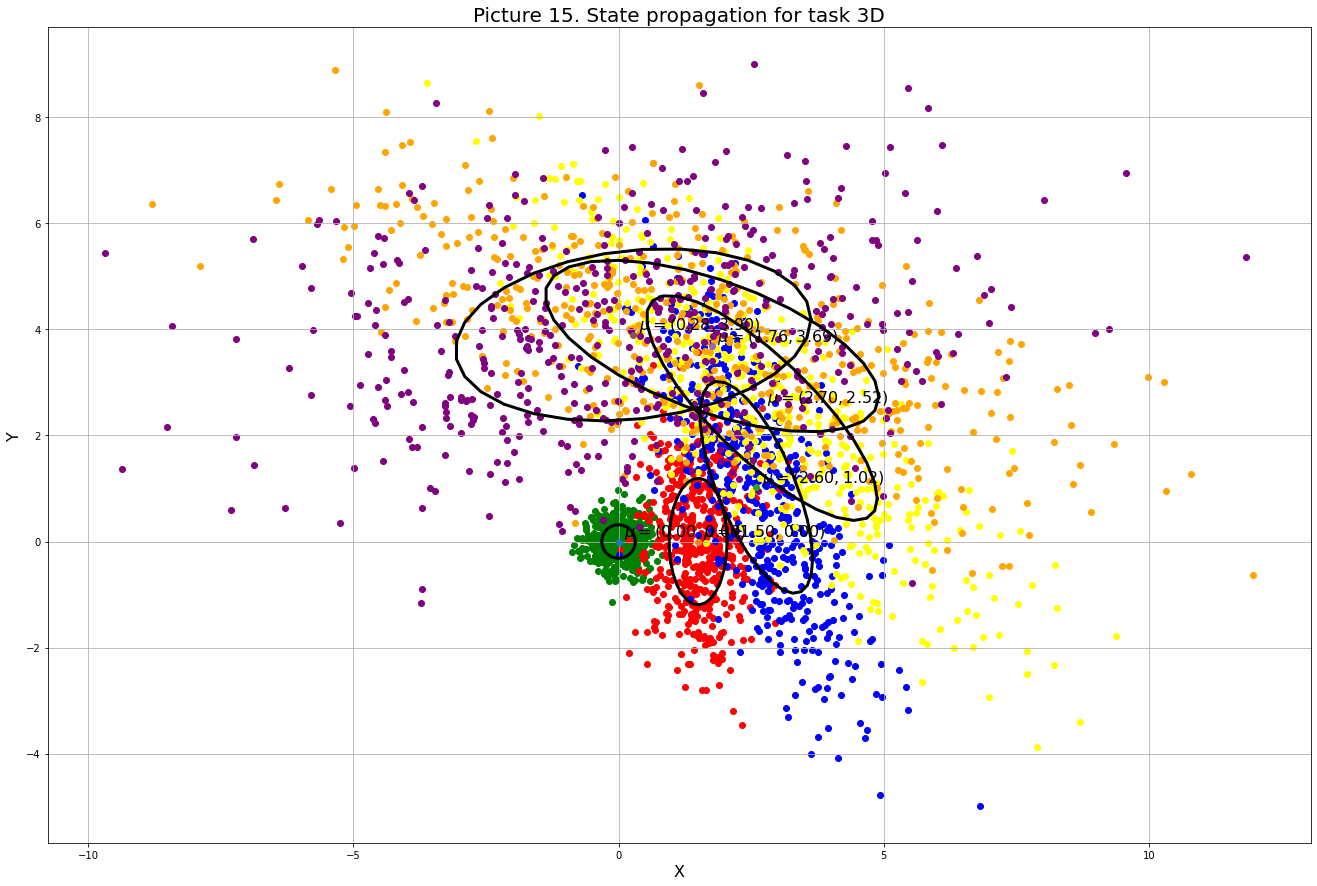

In [117]:
import sympy

theta, v, w, x, y, deltat= sympy.symbols('theta v w x y \delta{t}')
#deltat = sympy.Symbol('\delta t')

def jacobian(a, b):
    """ Function returns jacobian between two given vectors
    Args:
        a - Vector a
        b - Vector b
    
    Returns:
        J - Jacobian of two vectors
    """
    # Get length of vectors
    n = len(a)
    m = len(b)
    # Initialize Jacobian
    J = sympy.zeros(n, m)
    # For each cell in Jacobian
    for i in range(n):
        for j in range(m):
            # Get derivative with related respect
            J[i, j] = a[i].diff(b[j])
    return sympy.simplify(J)

def compute_num(func, params, num_params):
    """ Function perform numerical computation
    
    Args:
        func - Given function or Symbolic matrix to calculate
        params - tuple or list of parameters used in the function
        num_params - Corresponded numerical values of the parameters
    Returns:
        func_num - Numerical computed values of the function
    """
    # Lambdify the given function
    func_num = sympy.lambdify(params, func)
    # Calculate numerical values
    func_num = func_num(*num_params)
    return func_num

# Dynamic matrix
A = np.array([  [1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]])

# Initial state parameters
mean_X_0 = np.array((0, 0, 0))

cov_X_0 = np.array([ [0.1, 0, 0],
                     [0, 0.1, 0],
                     [0, 0, 0.5] ])

# State vector
X = sympy.Matrix((x, y, theta))

# Control sequence 
u = sympy.Matrix((v, w))

# Time step
dt = 0.5  

# Input gain matrix 
B = sympy.Matrix([  [sympy.cos(theta)*deltat, 0],    
                    [sympy.sin(theta)*deltat, 0],
                    [0, deltat] ])

# Noise model
mean_noise = np.array((0, 0, 0))

cov_noise = np.array([ [0.2, 0, 0],
                          [0, 0.2, 0],
                          [0, 0, 0.1] ])

# Compute J_x
J_x = jacobian(B*u, X)

# Propagate mean
# Define data structure for the state propagation
mean_prop = np.zeros((6, 3))
mean_prop[0] = mean_X_0

cov_prop = np.zeros((6, 3, 3))
cov_prop[0] = cov_X_0

u = np.array((3, 1.5))

# Propagation
for i in range(1, 6):
    noise_sample = np.random.multivariate_normal(mean_noise, cov_noise)
    B_num = compute_num(B,(deltat, theta), (dt, mean_prop[i-1, 2]))
    mean_prop[i] = A @ mean_prop[i-1] + B_num @ u + mean_noise
    J_x_num = compute_num(J_x, (deltat, v, theta), (dt, u[0], mean_prop[i-1, 2]))
    cov_prop[i] = (A + J_x_num) @ cov_prop[i-1] @ (A + J_x_num).T + cov_noise

# Plot iso countours
plt.figure(figsize=[30, 15])
colors = ['green', 'red', 'blue', 'yellow', 'orange', 'purple']
for i in range(6):
    # Number of samples = 1000
    y = sample_2d_gaussian(mean_prop[i, :2], cov_prop[i, :2, :2], 500)
    plot2dcov(mean_prop[i, :2], cov_prop[i, :2, :2], 1, color='black', xytext=(mean_prop[i, 0] + 0.1, mean_prop[i, 1] + 0.1))
    plt.scatter(y[:, 0], y[:, 1], color=colors[i], label='data')
plt.title('Picture 15. State propagation for task 3D', fontsize=titlesize)
plt.show()

**Conclusion:** Since we now have non-holonomic model and we apply different control inputs to different wheels, hence the robot is steering. Covariance of the robot location is pretty high.

**E: Repeat the same experiment as above, using the same control input ut and initial state estimate, now considering that noise is expressed in the action space instead of state space.**

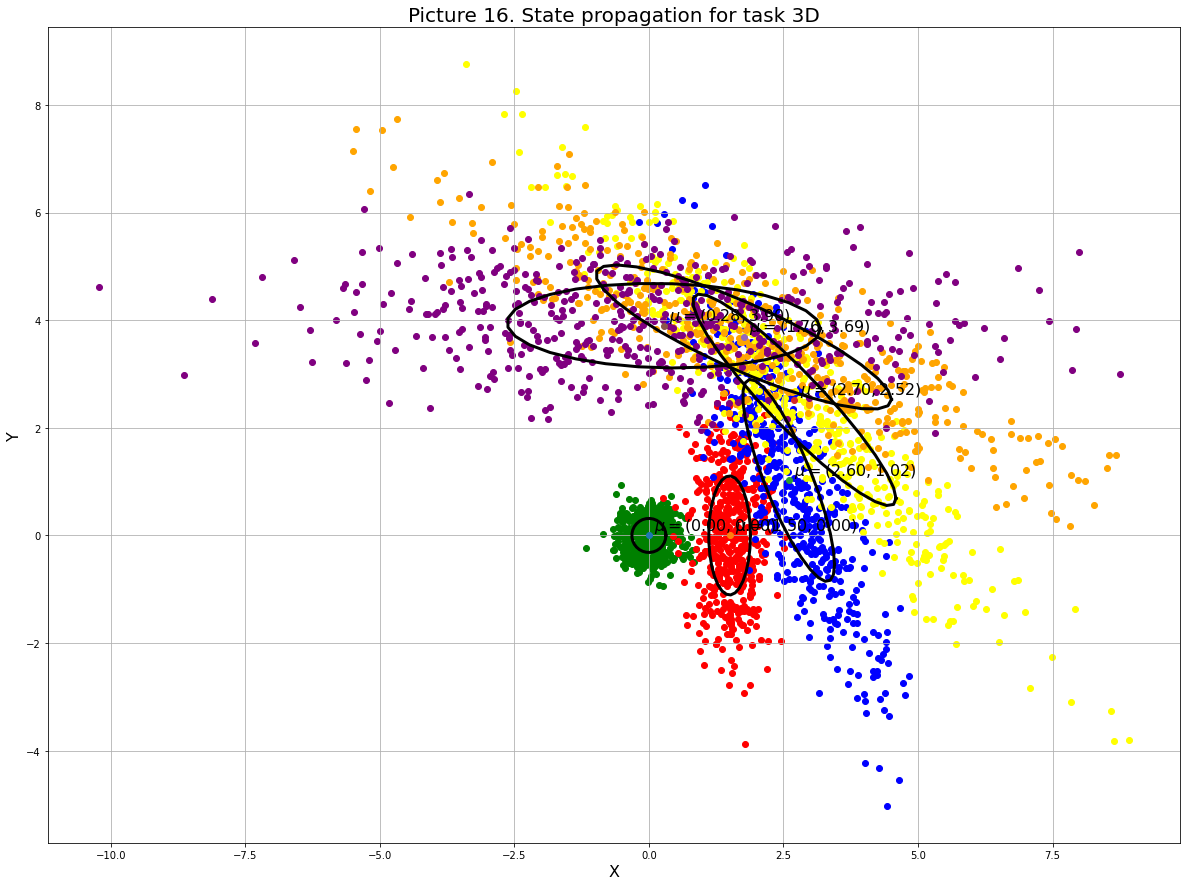

In [145]:
n_v, n_w= sympy.symbols('n_v n_w')
theta, v, w, x, y, deltat= sympy.symbols('theta v w x y \delta{t}')

# Dynamic matrix
A = sympy.Matrix([  [1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]])

# Initial state parameters
mean_X_0 = np.array((0, 0, 0))

cov_X_0 = np.array([ [0.1, 0, 0],
                     [0, 0.1, 0],
                     [0, 0, 0.5] ])

# State vector
X = sympy.Matrix((x, y, theta))

# Control sequence 
u = sympy.Matrix((v, w))

# Time step
dt = 0.5  

# Input gain matrix 
B = sympy.Matrix([  [sympy.cos(theta)*deltat, 0],    
                    [sympy.sin(theta)*deltat, 0],
                    [0, deltat] ])

# Noise vector
nu = sympy.Matrix((n_v, n_w))

# Noise model
mean_noise = np.array((0, 0))

cov_noise = np.array([ [0.2, 0],
                       [0, 0.1] ])

# Compute J_x
J_x = jacobian(A*X + B*u + B*nu, X)

# Compute J_nu
J_nu = jacobian(A*X + B*u + B*nu, nu)

# Propagate mean
# Define data structure for the state propagation
mean_prop = np.zeros((6, 3))
mean_prop[0] = mean_X_0

cov_prop = np.zeros((6, 3, 3))
cov_prop[0] = cov_X_0

u = np.array((3, 1.5))

# Numerical A
A = compute_num(A,(), ())

# Propagation
for i in range(1, 6):
    noise_sample = np.random.multivariate_normal(mean_noise, cov_noise)
    B_num = compute_num(B,(deltat, theta), (dt, mean_prop[i-1, 2]))
    mean_prop[i] = A @ mean_prop[i-1] + B_num @ u + B_num @ mean_noise
    J_x_num = compute_num(J_x, (deltat, v, theta, n_v), (dt, u[0], mean_prop[i-1, 2], mean_noise[0]))
    J_nu_num = compute_num(J_nu, (deltat, theta), (dt, mean_prop[i-1, 2]))
    cov_prop[i] = J_x_num @ cov_prop[i-1] @ J_x_num.T + J_nu_num @ cov_noise @ J_nu_num.T

# Plot iso countours
plt.figure(figsize=[30, 15])
colors = ['green', 'red', 'blue', 'yellow', 'orange', 'purple']
for i in range(6):
    # Number of samples = 1000
    y = sample_2d_gaussian(mean_prop[i, :2], cov_prop[i, :2, :2], 500)
    plot2dcov(mean_prop[i, :2], cov_prop[i, :2, :2], 1, color='black', xytext=(mean_prop[i, 0] + 0.1, mean_prop[i, 1] + 0.1))
    plt.scatter(y[:, 0], y[:, 1], color=colors[i], label='data')
plt.title('Picture 16. State propagation for task 3D', fontsize=titlesize)
plt.show()

**Conclusion:** In this experiment we considered that noise was expressed in the action space instead of state space. As a result we have obtained that covariance of such model is less than in previous example.

# Appendix